In [1]:
import numpy as np
from active_learning import *
from concept import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
boundary_task = [[1,1,1],
                 [1,1,0],
                 [1,0,0],
                 [0,0,0]]

line_task = [[1,0,0],
             [0,1,0],
             [0,0,1],
             [1,1,0],
             [0,1,1],
             [1,1,1]]

In [14]:
# prototype
concept_space = np.array(line_task)
lik = likelihood(concept_space)
n_concept, n_feature, n_y = lik.shape
prior = np.array([1./n_concept]*n_concept)
x_history = -np.ones(n_feature)
y_history = -np.ones(n_feature)
performance = -np.ones(n_feature)
true_concept = 3
for trial in range(n_feature):
#     score = self_teach(lik, prior)
    score = expected_information_gain(lik, prior)
    # forbid re-selection
    for ind in range(trial):
        score[int(x_history[ind])] = -np.inf
    x = score.argmax()
    y = concept_space[true_concept, x]
    post = posterior(x, y, lik, prior)
    # diagnose
#     print(trial)
#     print(score)
#     print(prior)
#     print(post)
    x_history[trial] = x
    y_history[trial] = y
    performance[trial] = post[true_concept]
    prior = post

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


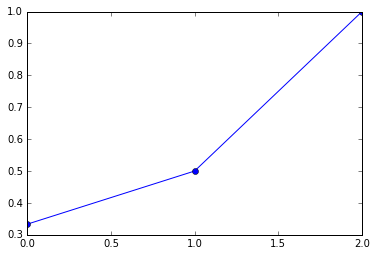

In [15]:
plt.plot(performance, 'o-')

In [16]:
print(x_history)

[0. 1. 2.]


In [5]:
for i in range(6):
    print(i)
    perf, xs, ys, ss = simulate_performance(line_task, truth_ind=i, method="self-teach")
    print(perf)
    print(xs)
    print(ss)

0
[0.33333333 1.         1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.33333333]
1
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.5       ]
2
[0.33333333 1.         1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.33333333]
3
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.5       ]
4
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.5       ]
5
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.33766234 0.39772727 0.5       ]


/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:116: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


In [6]:
for i in range(6):
    print(i)
    perf, xs, ys, ss = simulate_performance(line_task, truth_ind=i, method="eig")
    print(perf)
    print(xs)
    print(ss)

0
[0.33333333 1.         1.        ]
[0. 1. 2.]
[ 0.69314718  0.63651417 -0.        ]
1
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.69314718 0.63651417 0.69314718]
2
[0.33333333 1.         1.        ]
[0. 1. 2.]
[ 0.69314718  0.63651417 -0.        ]
3
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.69314718 0.63651417 0.69314718]
4
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.69314718 0.63651417 0.69314718]
5
[0.33333333 0.5        1.        ]
[0. 1. 2.]
[0.69314718 0.63651417 0.69314718]


/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


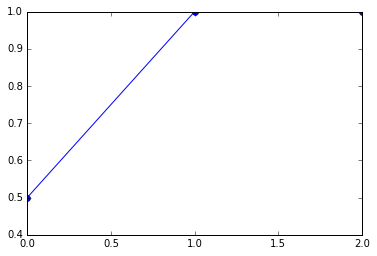

In [7]:
avg_perf_eig = average_performance(np.array(boundary_task), method='eig')
plt.plot(avg_perf_eig, '-o')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:119: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


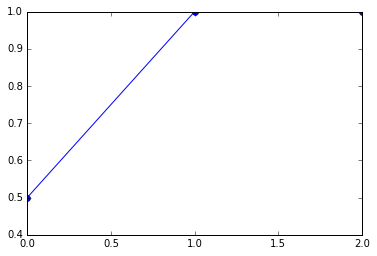

In [8]:
avg_perf_eig = average_performance(np.array(boundary_task), method='self-teach')
plt.plot(avg_perf_eig, '-o')

In [3]:
n_feature = 10
n_concept = 50
basis = concept_basis(n_feature)
concept_space = select_random_basis(basis, n_concept)

In [4]:
concept_space

array([[1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:85: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


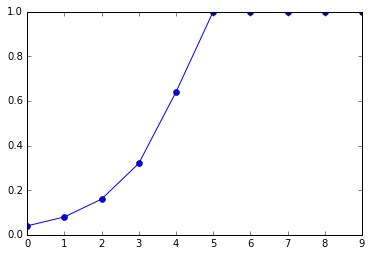

In [5]:
avg_perf_eig = average_performance(np.array(concept_space), method='eig')
plt.plot(avg_perf_eig, '-o')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:119: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


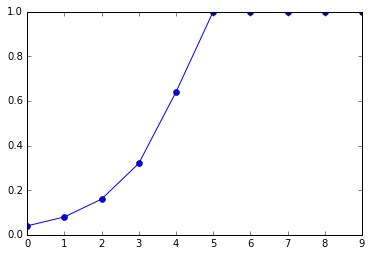

In [6]:
avg_perf_eig = average_performance(np.array(concept_space), method='self-teach')
plt.plot(avg_perf_eig, '-o')